In [19]:
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# Load the cleaned CSV
df=pd.read_csv('online_retail.csv',encoding='ISO-8859-1')

# Display first few rows
df.head()

,ï»¿InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [20]:
# Strip extra spaces in column names
df.columns = df.columns.str.strip()

# Check column names
print(df.columns)


Index(['ï»¿InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [21]:
# Drop missing CustomerID values
df_clean = df.dropna(subset=['CustomerID']).copy()

# Filter out returns, negative or zero quantities and prices
df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]

# Create TotalPrice = Quantity × UnitPrice
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

# Convert InvoiceDate to datetime format
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'], errors='coerce')

# Drop any rows with invalid dates
df_clean = df_clean.dropna(subset=['InvoiceDate'])

# Set InvoiceDate as index for time-based analysis
df_clean.set_index('InvoiceDate', inplace=True)

# Quick check
print(df_clean[['Quantity', 'UnitPrice', 'TotalPrice']].head())

                     Quantity  UnitPrice  TotalPrice
InvoiceDate                                         
2010-01-12 08:26:00         6       2.55       15.30
2010-01-12 08:26:00         6       3.39       20.34
2010-01-12 08:26:00         8       2.75       22.00
2010-01-12 08:26:00         6       3.39       20.34
2010-01-12 08:26:00         6       3.39       20.34


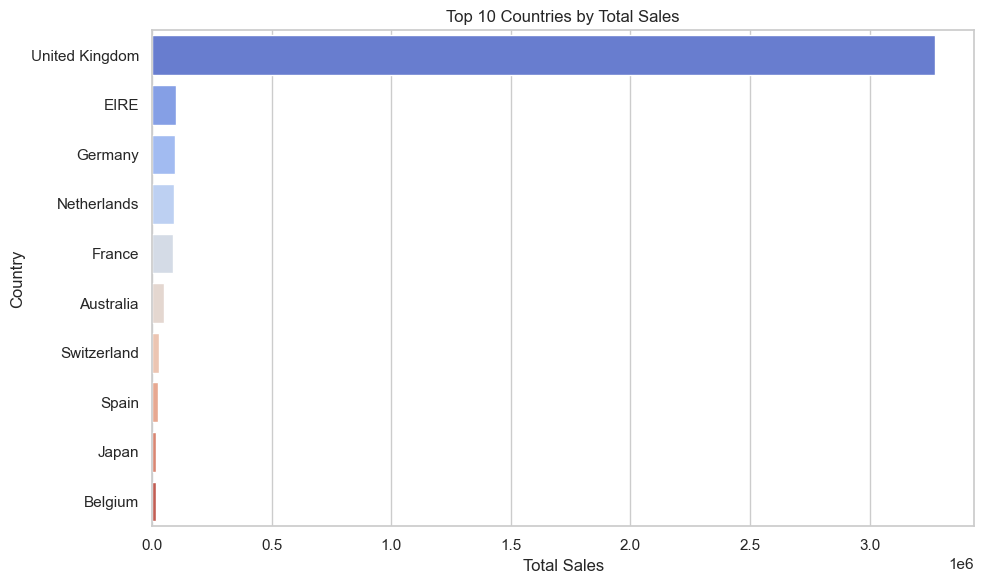

In [22]:
# Group by Country and sum total sales
top_countries = df_clean.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Convert to DataFrame for visualization
top_countries_df = top_countries.reset_index()
top_countries_df.columns = ['Country', 'Total Sales']

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=top_countries_df, x='Total Sales', y='Country', hue='Country', palette='coolwarm', legend=False)
plt.title('Top 10 Countries by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

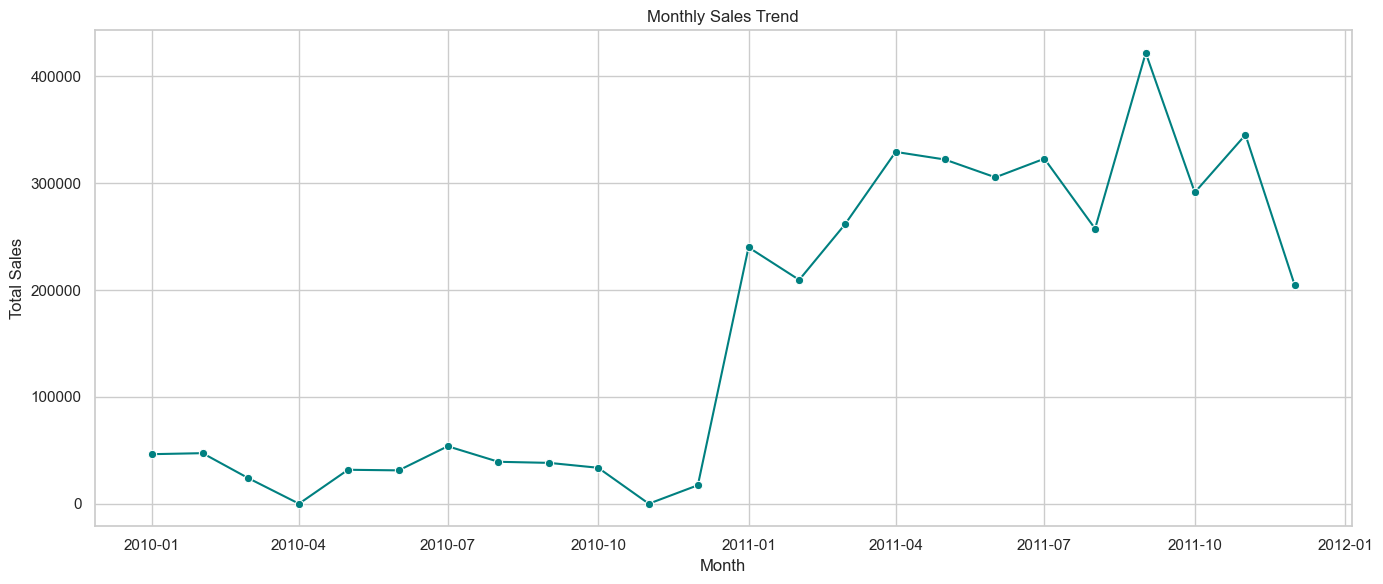

In [26]:
# Resample data by month start and sum total sales
monthly_sales = df_clean['TotalPrice'].resample('MS').sum()

# Plot monthly trend
plt.figure(figsize=(14, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='teal')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

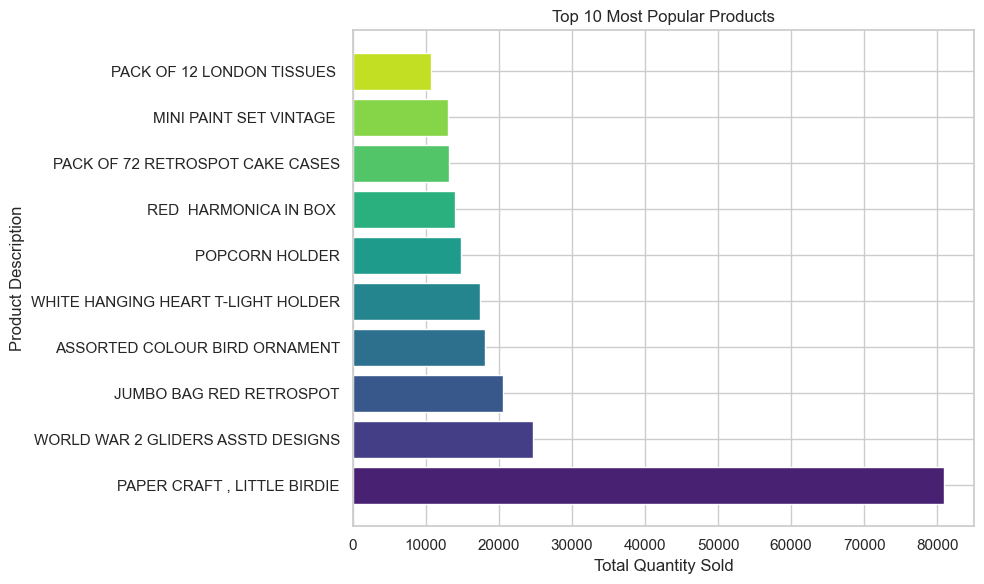

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_clean is already available and has 'Description' and 'Quantity'

# Step 1: Group and sort the top 10 products
top_products = df_clean.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Step 2: Create a DataFrame for plotting
top_products_df = top_products.reset_index()
top_products_df.columns = ['Description', 'Total Quantity']

# Step 3: Plot with matplotlib (no warning)
plt.figure(figsize=(10, 6))
bars = plt.barh(top_products_df['Description'], top_products_df['Total Quantity'],
                color=sns.color_palette('viridis', len(top_products_df)))

plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Description")
plt.title("Top 10 Most Popular Products")
plt.tight_layout()
plt.show()

